Introduction
============

This worksheet **explains the basic concepts of path planning, work and configuration space** needed for the course  "Current Topics in Applied Computer Science" (TACS)"

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

Important links are:

* Using the Jupyterlab: https://jupyterlab.readthedocs.io/en/stable/user/interface.html
* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll


Version | Author
------------ | -------------
0.1 | Björn Hein



# Path / Motion Planning

* What is path / motion planning?
* Work space $\leftrightarrow$ configuration space

### The Piano Mover's Problem

<img src="img-ip-2-0/ip-2-0-piano.png" width=250em style="float: right;" />

* Piano is a "robot" with 3 **DoF (Degrees of Freedom)**. Moving in three axis: translation in X-axis, in Y-axis, and rotation around Z-axis. 
* The kinematik is holonomic. 
  
  **Remark - holonomic**: Every DoF can be changed separately and independantly from the others. E.g. Movement along X-axis can be done independently from the movement along the Y-axis or the rotation around the Z-axis
  
  **Remark - non-holonomic**: a typical example is a car. It is not possible to turn without moving forward.
.
* Wall, chairs, tables, etc…. are fixed. We only use static obstacles.

Especially two interesting problems two solve regarding path planning:
* Getting a path, consisting of collision free movements between start and goal position.
* Information, whether such a path doesn‘t exist.

### Configuration Space (C-Space)

Before starting with path planning algorithms, it would be good to have a common representation of the  problem description for different planning tasks. In this way we will be able to compare the difficulty of path planning task and will be able to evaluate the performance of path planning algorithms $\rightarrow$ **C-Space**

* C-Space is a Tool to describe planning tasks for different types of problems in a common way [Udupa 77, Lozano-Perez 83]

* A **configuration** is a set of independent parameters uniquely specifying the actual state of a robotic system e.g.:
  * the values of the 6 axes of an industrial robot. E.g. represented by the 6 dimensional tuple
  
    [joint1, joint2, joint3, joint4, joint 5, joint 6]
    
  * if the robot is a “disc“ and its configuration is specified by the 2 dimensional tuple
  
    [x,y]
  
  * if the robot is a piano the coords x,y **and** the orientation around z-axis 
  
    [$t_x$, $t_y$, $r_z$]

* **Configuration Space** = space of all configurations



### Example: "point" robot

* Goal: transfer „point“ robot from start $q_s$ to goal $q_{g1}$
* as the robot has no dilatation in W-space --> C-space ≡ W-space
* DoF = 2:  C = R² 

<img src="img-ip-2-0/ip-2-0-env_pointRobot.png" width="550em" />

As it is C-space ≡ W-space in this example. The idea now is to transform **all** planning problems into a problem that looks like planning a point robot.

### A "Disc-Robot" = point robot with dilatation

A Disc-Robot is basically a point robot with an additional radius. Therefore following applies

<img src="img-ip-2-0/ip-2-0-env_discRobot.png" width="250em" style="float: right;" />

* disc robot = point robot + radius
* DoF = 2:  C = R²
* **BUT**: C-space ≠ W-space

A(q): subset of W-space 
occupied by A when at q

Main question is then, how to transform the W-Space into the C-space. Because then we can again plan a point robot in C-Space

In the case of the disc robot the transformation is pretty straight forward. Add the radius to every obstacle. See the following:

<img src="img-ip-2-0/ip-2-0-env_discRobotConversion.png" width="700em" />

W-Space obstacle $B_i$ + the radius of the Robot results in the obstacle representation $CB_i$ in C-Space.

Instead of planning the disc-robot in W-space it is now possible to plan a point robot in the corresponding C-space. Following another example.

<img src="img-ip-2-0/ip-2-0-env_discRobotConversionSimple.png" width="400em" />

Left: Disc-robot with obstacles, right: obstacles transformed into C-Space by extending them with the radius of the disc robot. **Now it is possible to plan a point robot solving the disc robot problem on the left**.


### Example: planar robot (2Dof)

Following picture shows an robot with two rotational joints. To describe the **configuration** of this robot a two dimensional tupel is used: [$j_1$, $j_2$]. Again, the idea is two use a point robot to solve the planning problem. Therefore the obstacles in W-Space have to be transformed into the C-Space. This is done by sampling and discretizing of the C-Space and checking for every **configuration**, whether it collides or not. This generates the blue areas in the picture on the right. If all obstacles are transformed the path planning can take place in the C-Space on the left using a point robot. The result will solve the path planning robot on the right.

| W-Space | C-Space |
| --- | ---  |
|<video src="img-ip-2-0/ip-2-0-ws_jungle.m4v" controls> Your browser does not support the video tag </video>|<img src="img-ip-2-0/ip-2-0-ws_jungle.png" width="400em" />|
| Robot with two rotation joints. | C-Space with transformed obstacles from W-space. Both axis are sampled and discretized <br> and every position is then checked for collision in W-Space. <br> If it collides this sampled point is marked (in the example blue color is chosen). <br> The blue areas are representing the colliding points. Path planning is then done in C-Space.|

**Remark:** As you can see, it is possible to transform planning problems of more complex robots into planning problems using a simple point robot. If this is possible for all robots, we can just develop algorighms for point robots and then use them to solve problems for more complex robotic systems. 

**Summary**: We will focus on developping algorithm for point robots as they can be applied for arbitrary robotic systems.

### Example: planar robot (3 Dof)

Following an example of a 3 Dof robot (Remark: it has 4 joints, therefore it would be a 4 DoF robot, but the last joint is fixed to 90°). The **configuration** of this robot is described by the tuple [$j_1$, $j_2$, $j_3$] The pictures of the right shows the 3 dimensional C-Space with the transformed obstacles from the W-Space. It is obvious that even simple looking problems in W-Space can be difficult problems two solve.

| W-Space | C-Space |
| --- | ---  |
|<img src="img-ip-2-0/ip-2-0-3dofrobot.png" width="200em" />|<img src="img-ip-2-0/ip-2-0-3dofrobotcspace.png" width="400em" />|
| Robot with three rotation joints. | C-Space with transformed obstacles. |

Again, it is possible to transform the path planning problem to solve it using a point robot in C-space. 

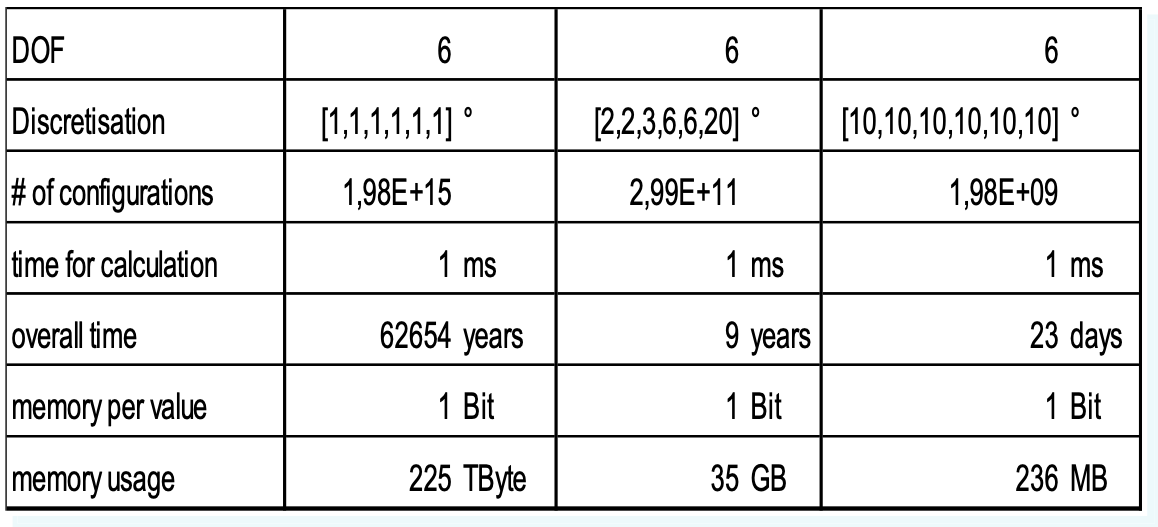### Challanges/Problems planning in C-Space

In general, as we can see, doing path planning in C-space is a very niced concept as it allows to focus on developping algorithms for point robots. **However it has one major downside**: In our concept for now we have to transform the obstacles from W-Space to C-Space before we can do the planning. Following table lists the needed time and memory to transorm the W-Space for a 6-Dof-Robot.

<img src="img-ip-2-0/ip-2-0-cspacetrafotable.png" width="400em" />

**It is obvious, that it is not possible to use this for real world problems!** It makes no sense to wait in the fastest case 23 days for transforming the W-Space to C-Space before beeing able to plan the path.

As we still like to plan in the C-Space we have to do it in another way. We use **Planning in the implicit C-Space**

### Implicit C-Space

One the one hand as shown in the previous paragraph, it is not reasonably possible two transform the W-Space into C-Space for real world problems on the other hand we want to do use this flexible ideof or doing the planning in the C-Space.

The solution is two use the **implicit C-Space** planning. The idea is pretty simple:

1. Planning is done in the C-Space
2. Obstacles are detected **during** the search using collision detection in W-Space

| Implicit C-Space|
| --- |
| <img src="img-ip-2-0/ip-2-0-implicitcspace.png" width="600em" /> |
| Planning is done in C-Space. Collision checking is done in W-Space|




**Summary**: The solution is pretty simple. We keep our concept and do the planning in the C-Space. Every **configuration** we reach in C-Space **during our search** we check for collision in W-Space.

**Remark**: The approach **exploring during search** has one important implication. As we are exploring the C-Space during the search the path planning algorithms actually don't know where the obstacles are. So they cannot use this information to optimize the planning. Strategies more or less have to consider concepts, how to search in an efficient, when you are basically **blind**.

# Testing environments



Shown in the previous section it is possible to stick to the concept of planning a C-Space (= planning a point robot). Therefore to dive into the world of path planning we first define test environments, in which we will test our planning algorithms. 

**Please check the Notebook Test_Environment**
